In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [23]:
#Generating data for the model
x1_mesh, x2_mesh = np.meshgrid(range(50,400,20), range(0,40,5))
y_mesh = -3*x1_mesh - 10*x2_mesh + 0.0333333*x1_mesh**2 - 0.0000571428*x1_mesh**3 + 500
mesh_shape = x1_mesh.shape
data = np.array([x1_mesh, x2_mesh, y_mesh]).reshape(3, -1).T
df_data = pd.DataFrame(data, columns = ['Area','Age','Price'])
df_data.to_excel('HomePrices.xlsx', index = False)

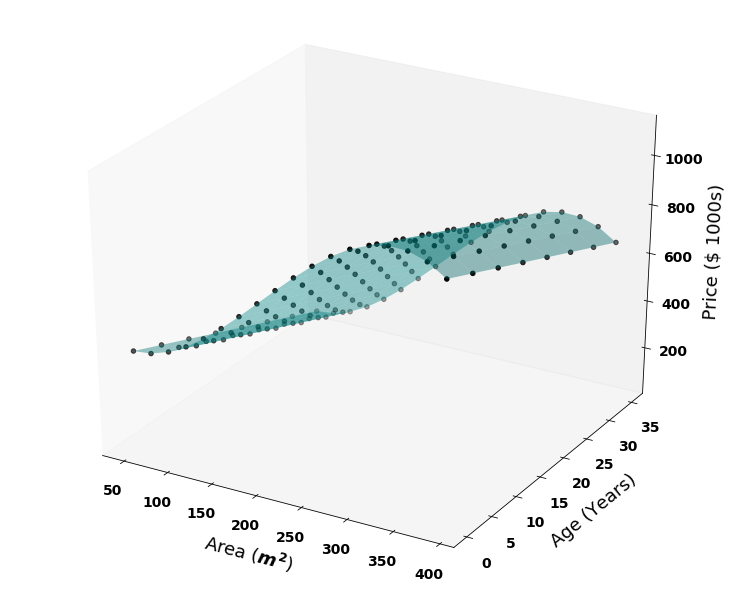

In [24]:
#Plotting the Home Prices
font = {'weight' : 'bold',
        'size'   : 16}
plt.rc('font', **font)

fig = plt.figure()
fig.set_size_inches(10,8)

ax = Axes3D(fig)
ax.scatter(x1_mesh, x2_mesh, y_mesh, color = 'black')
ax.plot_surface(x1_mesh, x2_mesh, y_mesh, alpha = 0.4, color = 'cyan')
ax.set_xlabel('Area ($m^2$)', fontsize = 18, labelpad = 20)
ax.set_ylabel('Age (Years)', fontsize = 18, labelpad = 20)
ax.set_zlabel('Price ($ 1000s)', fontsize = 18, labelpad = 20)
ax.tick_params(labelsize=14, direction='in', pad = 10)
ax.grid(False)
fig.savefig('HomePriceExample.png', dpi = 350)

In [25]:
#Simple Linear Model 
from sklearn.linear_model import LinearRegression

df = pd.read_excel('HomePrices.xlsx')
X, y = df[['Area','Age']], df[['Price']]

LinRegModel = LinearRegression()
LinRegModel.fit(X, y)
y_pred_lin = LinRegModel.predict(X)
LinRegMRE = round((100*np.abs((y.Price.values-y_pred_lin.ravel())/y.Price.values)).mean(), 1)
print('Linear Model Mean Relative Error: {}%'.format(LinRegMRE))

Linear Model Mean Relative Error: 9.5%


In [26]:
LinRegModel.coef_

array([[  2.2666614, -10.       ]])

In [27]:
LinRegModel.intercept_

array([299.0414708])

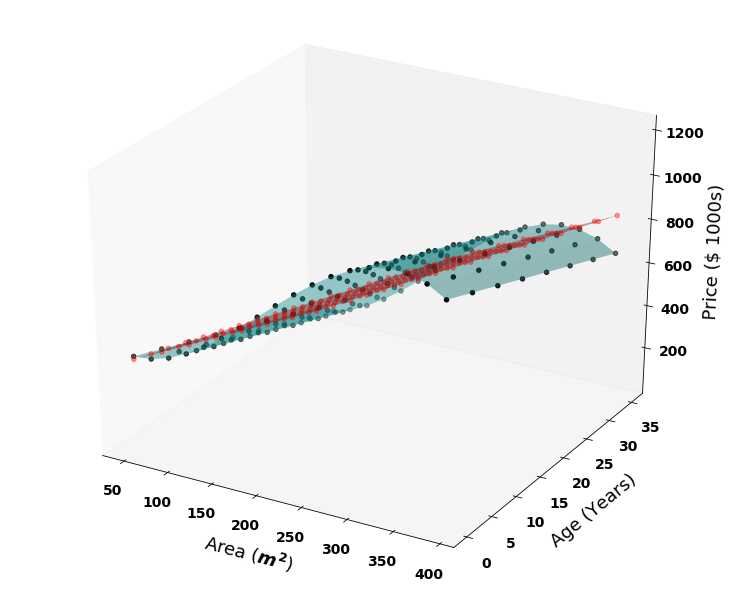

In [28]:
#Plotting the Linear Model
fig = plt.figure()
fig.set_size_inches(10,8)
ax = Axes3D(fig)
ax.scatter(x1_mesh, x2_mesh, y_mesh, color = 'black')
ax.plot_surface(x1_mesh, x2_mesh, y_mesh, alpha = 0.4, color = 'cyan')
ax.scatter(df.Area, df.Age, y_pred_lin, alpha = 0.4, color = 'red')
ax.plot_surface(df.Area.values.reshape(mesh_shape), df.Age.values.reshape(mesh_shape), y_pred_lin.reshape(mesh_shape), alpha = 0.4, color = 'red')
ax.set_xlabel('Area ($m^2$)', fontsize = 18, labelpad = 20)
ax.set_ylabel('Age (Years)', fontsize = 18, labelpad = 20)
ax.set_zlabel('Price ($ 1000s)', fontsize = 18, labelpad = 20)
ax.tick_params(labelsize=14, direction='in', pad = 10)
ax.grid(False)
fig.savefig('LinearModel.png', dpi = 350)

In [29]:
#Implementing Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

poly_reg_transform = PolynomialFeatures(degree=3)
X_poly = poly_reg_transform.fit_transform(X)
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_poly,y)
y_pred_poly = poly_reg_model.predict(X_poly)

PolyRegMRE = round((100*np.abs(y.Price.values-y_pred_poly.ravel())/y.Price.values).mean(), 1)
print('Polynomial Reg Model MRE: {}%'.format(PolyRegMRE))

Polynomial Reg Model MRE: 0.0%


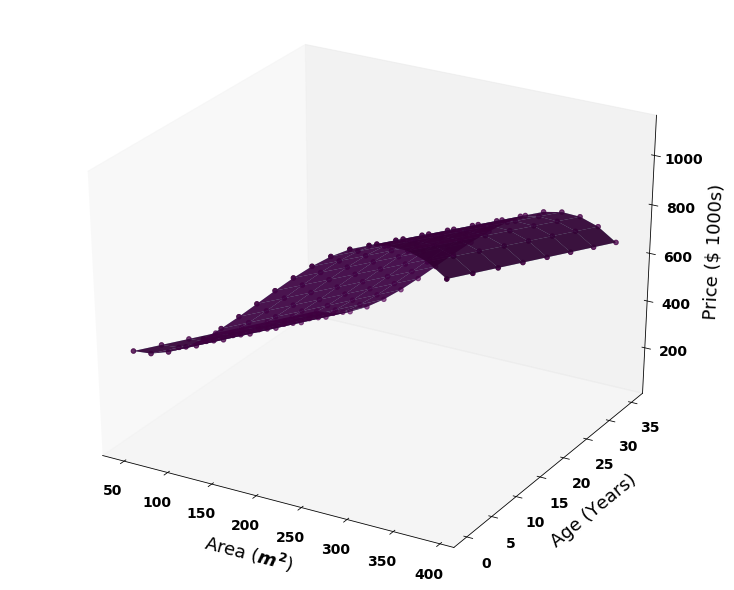

In [30]:
#Plotting Polynomial Regression
fig = plt.figure()
fig.set_size_inches(10,8)
ax = Axes3D(fig)
ax.scatter(x1_mesh, x2_mesh, y_mesh, color = 'black')
ax.plot_surface(x1_mesh, x2_mesh, y_mesh, alpha = 0.4, color = 'cyan')
ax.scatter(df.Area, df.Age, y_pred_poly, alpha = 0.4, color = 'purple')
ax.plot_surface(df.Area.values.reshape(mesh_shape), df.Age.values.reshape(mesh_shape), y_pred_poly.reshape(mesh_shape), alpha = 0.9, color = 'purple')

ax.set_xlabel('Area ($m^2$)', fontsize = 18, labelpad = 20)
ax.set_ylabel('Age (Years)', fontsize = 18, labelpad = 20)
ax.set_zlabel('Price ($ 1000s)', fontsize = 18, labelpad = 20)
ax.tick_params(labelsize=14, direction='in', pad = 10)
ax.grid(False)
fig.savefig('PolyRegModel.png', dpi = 350)

In [31]:
poly_reg_model.coef_

array([[ 0.00000000e+00, -3.00000000e+00, -1.00000000e+01,
         3.33333000e-02,  5.18655830e-13,  1.57758763e-12,
        -5.71428000e-05, -1.84172403e-15, -2.81098009e-15,
        -1.33420678e-14]])

In [32]:
poly_reg_model.intercept_

array([499.99999997])